### Exercise 1

<div class="alert-success">
    
1. **Use two maps of points.**

2. **Compute the distance matrix for both maps.**

3. **Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.**
</div>

In [7]:
#SOLO ES UNA GRAFICA UNA MATRIZ Y NADA MAS
#sellecionar lo que ncesitan hacer
#esa es la distancia de punto a punto 

In [74]:
from  fiona import listlayers
import os

argentinaMaps=os.path.join('maps','argentina22171','argentinaMaps22171_all3.gpkg')

#layers in maps
listlayers(argentinaMaps)

['country',
 'cities',
 'rivers',
 'states',
 'municipalities',
 'border',
 'airports']

In [75]:
# reading in the data:
import os
import geopandas as gpd

states=gpd.read_file(argentinaMaps,layer='states')
municipalities=gpd.read_file(argentinaMaps,layer='municipalities')
airports=gpd.read_file(argentinaMaps,layer='airports')
rivers=gpd.read_file(argentinaMaps,layer='rivers')
border=gpd.read_file(argentinaMaps,layer='border')

In [110]:
medium_airport=airports[airports['type']=='medium_airport'] #can't use "airports.type"
medium_airport.reset_index(drop=True, inplace=True)
medium_airport

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Malvinas Argentinas Airport,medium_airport,-54.843300,-68.295800,102.0,Tierra del Fuego Province,Ushuaia,POINT (1737945.839 3915824.327)
1,El Calafate - Commander Armando Tola Internati...,medium_airport,-50.280300,-72.053101,669.0,Santa Cruz Province,El Calafate,POINT (1496258.115 4429856.907)
2,Cataratas Del Iguazú International Airport,medium_airport,-25.737301,-54.473400,916.0,Misiones Province,Puerto Iguazu,POINT (3275864.379 7033639.587)
3,El Plumerillo Airport,medium_airport,-32.831699,-68.792900,2310.0,Mendoza Province,Mendoza,POINT (1800378.820 6363192.739)
4,San Carlos De Bariloche Airport,medium_airport,-41.151199,-71.157501,2774.0,Río Negro Province,San Carlos de Bariloche,POINT (1570761.950 5444147.406)
...,...,...,...,...,...,...,...,...
63,Orán Airport,medium_airport,-23.152800,-64.329201,1171.0,Salta Province,Orán,POINT (2287195.989 7419561.720)
64,Rincon De Los Sauces Airport,medium_airport,-37.390598,-68.904198,1968.0,Neuquén Province,Rincon de los Sauces,POINT (1774214.302 5857484.503)
65,Tres Arroyos Airport,medium_airport,-38.386900,-60.329700,400.0,Buenos Aires Province,Tres Arroyos,POINT (2521222.679 5686315.521)
66,Villa Dolores Airport,medium_airport,-31.945200,-65.146301,1847.0,Córdoba Province,Villa Dolores,POINT (2148716.857 6445469.683)


In [100]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Management System',
 'Good Ho

In [99]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3824 non-null   object 
 1   Country Code  3824 non-null   object 
 2   Latitude      3824 non-null   float64
 3   Longitude     3824 non-null   float64
dtypes: float64(2), object(2)
memory usage: 119.6+ KB


In [102]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3824 non-null   object 
 1   Country Code  3824 non-null   object 
 2   Latitude      3824 non-null   float64
 3   Longitude     3824 non-null   float64
dtypes: float64(2), object(2)
memory usage: 119.6+ KB


In [104]:
#primero creo los puntos espaciales no proyectados
#1.spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# notice it is unprojected

#2. subset: SUBSETTT me quedo con Brasil
seaports_arg=seaports[seaports['Country Code']=='Argentina'].copy()

#3. reset indexes
seaports_arg.reset_index(drop=True, inplace=True)

#4. reprojecting
seaports_arg_22171=seaports_arg.to_crs(22171) # projected crs

<Axes: >

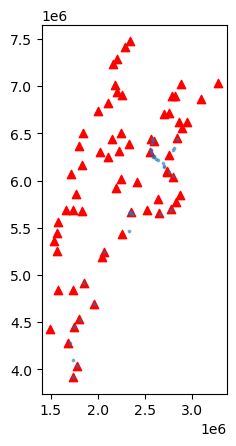

In [111]:
base=medium_airport.plot(color='red',marker="^")
seaports_arg_22171.plot(ax=base,alpha=0.5,markersize=3)